In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv("train.csv")

train_df.head()

,ID,url,title,label
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0


In [4]:
test_df = pd.read_csv("test.csv")

test_df.head()

,ID,url,title
0,135309,www.kommersant.ru,Шестой кассационный суд в Самаре начнет работу...
1,135310,urexpert.online,"Что такое индексация алиментов, кем и в каких ..."
2,135311,imperimeha.ru,Женщинам | Империя Меха - Part 12
3,135312,national-porn.com,"Небритые, волосатые киски: Порно всех стран и ..."
4,135313,2gis.ru,67


# подготовка данных

## URL

In [5]:
train_df["url"].isna().sum()

0

In [6]:
train_df["url"].describe

<bound method NDFrame.describe of 0                           m.kp.md
1                         www.kp.by
2                     fanserials.tv
3                   colorbox.spb.ru
4                     tula-sport.ru
                    ...            
135304                      mail.ru
135305                   www.ntv.ru
135306    topclassiccarsforsale.com
135307                  wowcream.ru
135308                   www.ubu.ru
Name: url, Length: 135309, dtype: object>

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135309 entries, 0 to 135308
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      135309 non-null  int64 
 1   url     135309 non-null  object
 2   title   135309 non-null  object
 3   label   135309 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.1+ MB


In [8]:
from transformers import AutoTokenizer

/raid/alebedev/myenvtr/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
#добавляем длину ссылки
def get_url_length(url):
    # убираем префиксы
    prefixes = ['http://', 'https://']
    for prefix in prefixes:
        if url.startswith(prefix):
            url = url[len(prefix):]

    # убираем 'www.'
    url = url.replace('www.', '')

    # Return the length of the remaining URL
    return len(url)

In [10]:
train_df['url_len'] = train_df['url'].apply(lambda x: get_url_length(str(x)))

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135309 entries, 0 to 135308
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ID       135309 non-null  int64 
 1   url      135309 non-null  object
 2   title    135309 non-null  object
 3   label    135309 non-null  int64 
 4   url_len  135309 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.2+ MB


In [12]:
train_df

,ID,url,title,label,url_len
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13
...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11


In [14]:
from tldextract import extract as tld_extract
from tld import get_tld, is_tld
from tld.exceptions import TldDomainNotFound, TldBadUrl, TldIOError

In [15]:
# получаем поддоменное имя
def extract_pri_domain(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [16]:
train_df['pri_domain'] = train_df['url'].apply(lambda x: extract_pri_domain(x))

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135309 entries, 0 to 135308
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          135309 non-null  int64 
 1   url         135309 non-null  object
 2   title       135309 non-null  object
 3   label       135309 non-null  int64 
 4   url_len     135309 non-null  int64 
 5   pri_domain  135148 non-null  object
dtypes: int64(3), object(3)
memory usage: 6.2+ MB


In [19]:
train_df

,ID,url,title,label,url_len,pri_domain
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru
...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru


In [20]:
# подсчёт букв
def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters
# подсчёт цифр
def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits
# подсчёт спец символов
def count_special_chars(url):
    special_chars = set(string.punctuation)
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

In [21]:
train_df['letters_count']        = train_df['url'].apply(lambda x: count_letters(x))
train_df['digits_count']         = train_df['url'].apply(lambda x: count_digits(x))
train_df['special_chars_count']  = train_df['url'].apply(lambda x: count_special_chars(x))

NameError: name 'string' is not defined

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135309 entries, 0 to 135308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             135309 non-null  int64 
 1   url            135309 non-null  object
 2   title          135309 non-null  object
 3   label          135309 non-null  int64 
 4   url_len        135309 non-null  int64 
 5   pri_domain     135148 non-null  object
 6   letters_count  135309 non-null  int64 
 7   digits_count   135309 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 8.3+ MB


In [23]:
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0
...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0


In [24]:
from urllib.parse import urlparse

In [25]:
import re

In [32]:
# поиск аномальных ссылок
def abnormal_url(url):
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc
    if netloc:
        netloc = str(netloc)
        match = re.search(netloc, url)
        if match:
            return 1
    return 0

In [33]:
train_df['abnormal_url']  = train_df['url'].apply(lambda x: abnormal_url(x))

In [34]:
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,abnormal_url
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,0
...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,0
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,0
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,0
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,0


In [35]:
#проверка на HTTPS (secured)
def secure_http(url):
    return int(urlparse(url).scheme == 'https')

In [36]:
train_df['secure_http']  = train_df['url'].apply(lambda x: secure_http(x))

In [37]:
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,abnormal_url,secure_http
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,0,0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,0,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,0,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,0,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,0,0
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,0,0
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,0,0
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,0,0


In [38]:
import ipaddress

In [39]:
#проверка ip
def have_ip_address(url):
    try:
        parsed_url = urlparse(url)
        if parsed_url.hostname:
            ip = ipaddress.ip_address(parsed_url.hostname)
            return isinstance(ip, (ipaddress.IPv4Address, ipaddress.IPv6Address))
    except ValueError:
        pass  # Invalid hostname or IP address

    return 0

In [40]:
train_df['have_ip']  = train_df['url'].apply(lambda x: have_ip_address(x))

In [41]:
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,abnormal_url,secure_http,have_ip
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,0,0,0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,0,0,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,0,0,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,0,0,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,0,0,0
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,0,0,0
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,0,0,0
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,0,0,0


In [42]:
train_df.isnull().sum()

ID                 0
url                0
title              0
label              0
url_len            0
pri_domain       161
letters_count      0
digits_count       0
abnormal_url       0
secure_http        0
have_ip            0
dtype: int64

In [43]:
train_df.fillna(0,inplace=True)

In [45]:
train_df.isnull().sum()

ID               0
url              0
title            0
label            0
url_len          0
pri_domain       0
letters_count    0
digits_count     0
abnormal_url     0
secure_http      0
have_ip          0
dtype: int64

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
from plotly.subplots import make_subplots
from plotly import graph_objects as go

# посмотрим распределения признаков

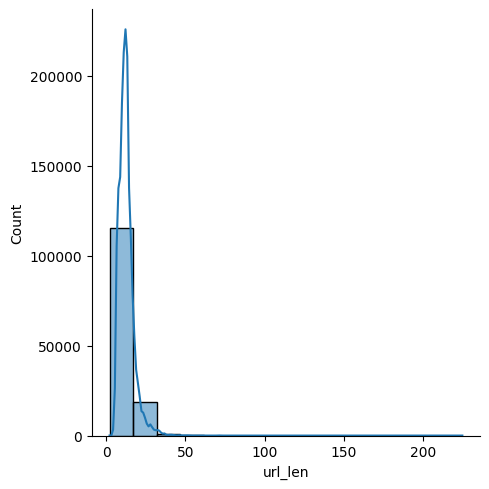

In [54]:
sns.displot(train_df['url_len'], kde=True, bins=15)

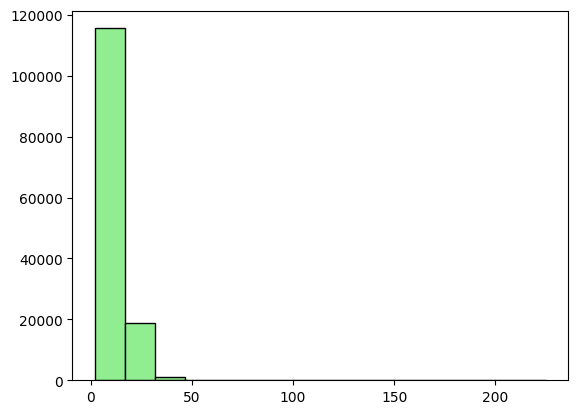

In [56]:
plt.hist(train_df['url_len'], color='lightgreen', ec='black', bins=15)
None

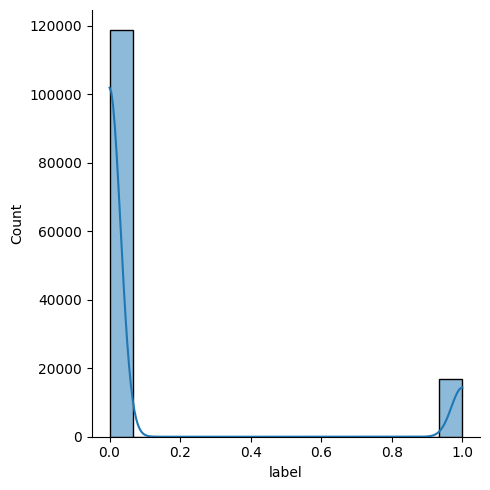

In [59]:
sns.displot(train_df['label'], kde=True, bins=15)
None

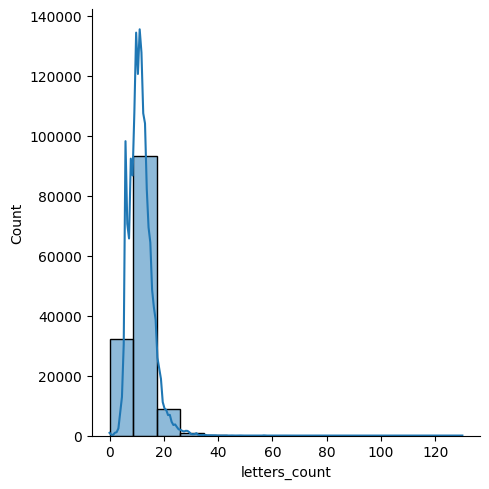

In [60]:
sns.displot(train_df['letters_count'], kde=True, bins=15)
None

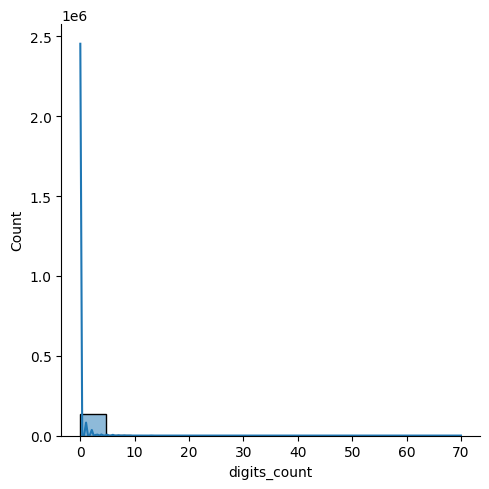

In [61]:
sns.displot(train_df['digits_count'], kde=True, bins=15)
None

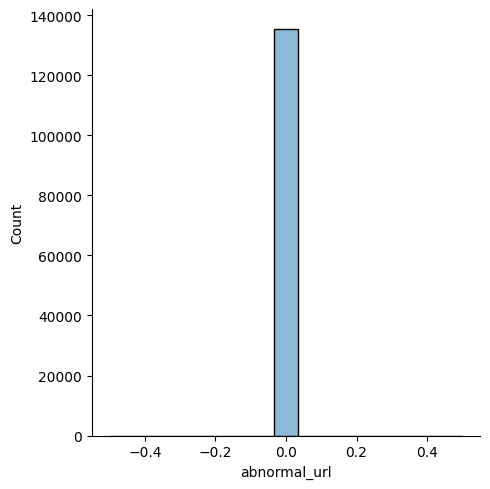

In [62]:
sns.displot(train_df['abnormal_url'], kde=True, bins=15)
None

In [63]:
train_df['abnormal_url'].sum()

0

In [67]:
train_df = train_df.drop('abnormal_url', axis = 1)

In [68]:
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,secure_http,have_ip
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,0,0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,0,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,0,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,0,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,0,0
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,0,0
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,0,0
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,0,0


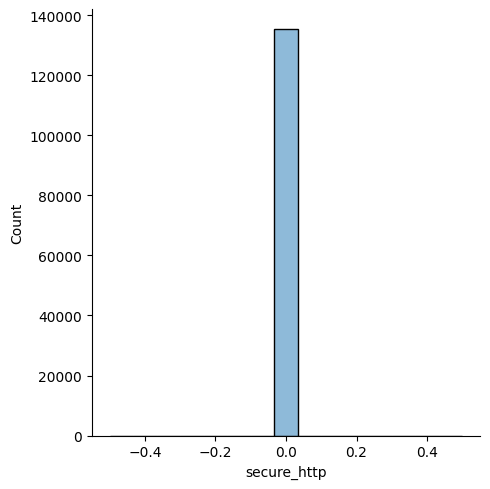

In [69]:
sns.displot(train_df['secure_http'], kde=True, bins=15)
None

In [71]:
train_df['secure_http'].sum()

0

In [72]:
train_df = train_df.drop('secure_http', axis = 1)

In [73]:
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,have_ip
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,0
...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,0
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,0
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,0
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,0


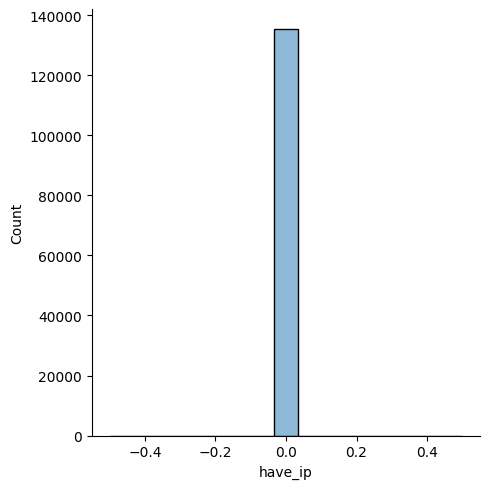

In [74]:
sns.displot(train_df['have_ip'], kde=True, bins=15)
None

In [76]:
train_df['have_ip'].sum()

0

In [78]:
train_df = train_df.drop('have_ip', axis = 1)
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0
...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0


In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135309 entries, 0 to 135308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             135309 non-null  int64 
 1   url            135309 non-null  object
 2   title          135309 non-null  object
 3   label          135309 non-null  int64 
 4   url_len        135309 non-null  int64 
 5   pri_domain     135309 non-null  object
 6   letters_count  135309 non-null  int64 
 7   digits_count   135309 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 8.3+ MB


In [84]:
from wordcloud import WordCloud

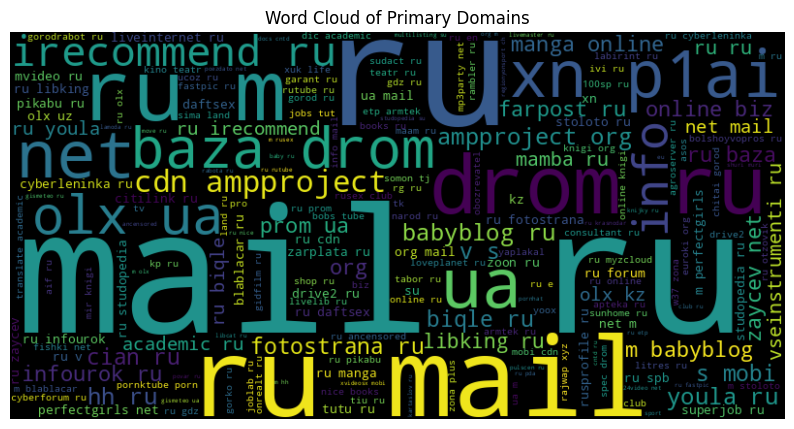

In [85]:
# Convert pri_domain values to strings and filter out None and int values
filtered_domains = train_df['pri_domain'].map(str).dropna()

# Concatenate all pri_domain values into a single string
text = ' '.join(filtered_domains)

# Generate the WordCloud data
wordcloud = WordCloud(background_color='black', colormap='viridis', width=800, height=400).generate(text)

# Plot the WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Primary Domains', color='black')
plt.show()

In [86]:
train_df.corr()

,ID,label,url_len,letters_count,digits_count
ID,1.000000,0.002461,-0.003053,-0.000987,-0.002145
label,0.002461,1.000000,0.057212,0.064443,-0.013224
url_len,-0.003053,0.057212,1.000000,0.905143,0.402264
letters_count,-0.000987,0.064443,0.905143,1.000000,0.105209
digits_count,-0.002145,-0.013224,0.402264,0.105209,1.000000


In [87]:
def get_url_region(primary_domain):
    ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }
    
    for ccTLD in ccTLD_to_region:
        if primary_domain.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]
    
    return "Global"

In [89]:
train_df['url_region'] = train_df['pri_domain'].apply(lambda x: get_url_region(str(x)))

In [91]:
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135309 entries, 0 to 135308
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             135309 non-null  int64 
 1   url            135309 non-null  object
 2   title          135309 non-null  object
 3   label          135309 non-null  int64 
 4   url_len        135309 non-null  int64 
 5   pri_domain     135309 non-null  object
 6   letters_count  135309 non-null  int64 
 7   digits_count   135309 non-null  int64 
 8   url_region     135309 non-null  object
dtypes: int64(5), object(4)
memory usage: 9.3+ MB


,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,url_region
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,Moldova
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,Belarus
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,Tuvalu
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,Russia
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,Russia
...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,Russia
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,Russia
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,Global
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,Russia


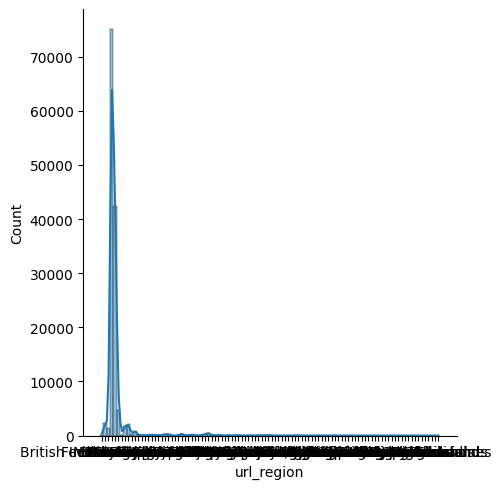

In [92]:
sns.displot(train_df['url_region'], kde=True, bins=15)
None

In [93]:
def extract_root_domain(url):
    extracted = tldextract.extract(url)
    root_domain = extracted.domain
    return root_domain

In [95]:
import tldextract
from tldextract import extract as tld_extract

In [96]:
train_df['root_domain'] = train_df['pri_domain'].apply(lambda x: extract_root_domain(str(x)))

In [98]:
train_df


,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,url_region,root_domain
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,Moldova,kp
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,Belarus,kp
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,Tuvalu,fanserials
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,Russia,spb
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,Russia,tula-sport
...,...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,Russia,mail
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,Russia,ntv
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,Global,topclassiccarsforsale
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,Russia,wowcream


In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135309 entries, 0 to 135308
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             135309 non-null  int64 
 1   url            135309 non-null  object
 2   title          135309 non-null  object
 3   label          135309 non-null  int64 
 4   url_len        135309 non-null  int64 
 5   pri_domain     135309 non-null  object
 6   letters_count  135309 non-null  int64 
 7   digits_count   135309 non-null  int64 
 8   url_region     135309 non-null  object
 9   root_domain    135309 non-null  object
dtypes: int64(5), object(5)
memory usage: 10.3+ MB


In [100]:
train_df.duplicated().sum()

0

In [102]:
train_df.shape

(135309, 10)

In [103]:
train_df.columns

Index(['ID', 'url', 'title', 'label', 'url_len', 'pri_domain', 'letters_count',
       'digits_count', 'url_region', 'root_domain'],
      dtype='object')

In [105]:
data = train_df.drop(columns=['url','label','pri_domain'])

In [106]:
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,url_region,root_domain
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,Moldova,kp
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,Belarus,kp
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,Tuvalu,fanserials
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,Russia,spb
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,Russia,tula-sport
...,...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,Russia,mail
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,Russia,ntv
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,Global,topclassiccarsforsale
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,Russia,wowcream


In [107]:
data['root_domain'].value_counts()

mail                 7900
drom                 2272
olx                  1638
hh                    800
irecommend            767
                     ... 
hoztovary-zakamie       1
tiarashop               1
xn--c1akfgfddbd         1
fenix-master            1
wowcream                1
Name: root_domain, Length: 32112, dtype: int64

In [110]:
len(data[data['root_domain'] == '0'])

161

# обработка title 

In [111]:
data["title"]

0         Экс-министр экономики Молдовы - главе МИДЭИ, ц...
1         Эта песня стала известна многим телезрителям б...
2         Банши 4 сезон 2 серия Бремя красоты смотреть о...
3                                     Не Беси Меня Картинки
4         В Новомосковске сыграют следж-хоккеисты алекси...
                                ...                        
135304    пора тюльпанов турецкий сериал на русском язык...
135305    Остросюжетный сериал «Шеф. Игра на повышение»....
135306    1941 Plymouth Special Deluxe Hot Rod, Automati...
135307    Купить It's Skin Сыворотка питательная Power 1...
135308    Технический спирт в канистрах и флаконах, купи...
Name: title, Length: 135309, dtype: object

In [112]:
from bs4 import BeautifulSoup

In [113]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /raid/alebedev/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [117]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [121]:
tokenizer(train_df['title'][0])

{'input_ids': [101, 472, 28399, 28403, 118, 487, 17424, 17127, 17424, 28403, 28404, 20442, 504, 28399, 16948, 17127, 16948, 28401, 17424, 28399, 17424, 459, 16948, 28400, 28396, 24625, 28413, 118, 478, 28400, 10286, 28394, 19692, 459, 28374, 28370, 28390, 28374, 117, 497, 19692, 28400, 28414, 485, 16948, 28404, 16948, 20442, 16948, 28395, 16948, 492, 28396, 19692, 28400, 10286, 28404, 28414, 483, 28398, 491, 19692, 28403, 28402, 28405, 28393, 28400, 17424, 28399, 17424, 488, 19692, 490, 20442, 16948, 28403, 17424, 28404, 19692, 28400, 14800, 117, 475, 479, 16948, 17127, 16948, 20442, 10286, 131, 460, 10286, 28396, 16948, 483, 28398, 28393, 19692, 28395, 10286, 28404, 28414, 479, 16948, 28400, 28395, 16948, 28395, 16948, 488, 10286, 28407, 16948, 28397, 28396, 19692, 17127, 17424, 14800, 488, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [122]:
train_df['bert_title'] = train_df['title'].apply(lambda x: tokenizer(x))

In [123]:
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,url_region,root_domain,bert_title
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,Moldova,kp,"[input_ids, token_type_ids, attention_mask]"
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,Belarus,kp,"[input_ids, token_type_ids, attention_mask]"
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,Tuvalu,fanserials,"[input_ids, token_type_ids, attention_mask]"
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,Russia,spb,"[input_ids, token_type_ids, attention_mask]"
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,Russia,tula-sport,"[input_ids, token_type_ids, attention_mask]"
...,...,...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,Russia,mail,"[input_ids, token_type_ids, attention_mask]"
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,Russia,ntv,"[input_ids, token_type_ids, attention_mask]"
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,Global,topclassiccarsforsale,"[input_ids, token_type_ids, attention_mask]"
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,Russia,wowcream,"[input_ids, token_type_ids, attention_mask]"


In [124]:
train_df['bert_title'][0]

{'input_ids': [101, 472, 28399, 28403, 118, 487, 17424, 17127, 17424, 28403, 28404, 20442, 504, 28399, 16948, 17127, 16948, 28401, 17424, 28399, 17424, 459, 16948, 28400, 28396, 24625, 28413, 118, 478, 28400, 10286, 28394, 19692, 459, 28374, 28370, 28390, 28374, 117, 497, 19692, 28400, 28414, 485, 16948, 28404, 16948, 20442, 16948, 28395, 16948, 492, 28396, 19692, 28400, 10286, 28404, 28414, 483, 28398, 491, 19692, 28403, 28402, 28405, 28393, 28400, 17424, 28399, 17424, 488, 19692, 490, 20442, 16948, 28403, 17424, 28404, 19692, 28400, 14800, 117, 475, 479, 16948, 17127, 16948, 20442, 10286, 131, 460, 10286, 28396, 16948, 483, 28398, 28393, 19692, 28395, 10286, 28404, 28414, 479, 16948, 28400, 28395, 16948, 28395, 16948, 488, 10286, 28407, 16948, 28397, 28396, 19692, 17127, 17424, 14800, 488, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [125]:
print(tokenizer)

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)


In [126]:
import torch

In [128]:
from transformers import BertTokenizer, BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [129]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [130]:
train_df['bert_title_class'] = train_df['title'].apply(lambda x: tokenizer(x))

In [131]:
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,url_region,root_domain,bert_title,bert_title_class
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,Moldova,kp,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,Belarus,kp,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,Tuvalu,fanserials,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,Russia,spb,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,Russia,tula-sport,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
...,...,...,...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,Russia,mail,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,Russia,ntv,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,Global,topclassiccarsforsale,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,Russia,wowcream,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"


In [133]:
data

,ID,title,url_len,letters_count,digits_count,url_region,root_domain
0,0,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",7,5,0,Moldova,kp
1,1,Эта песня стала известна многим телезрителям б...,5,7,0,Belarus,kp
2,2,Банши 4 сезон 2 серия Бремя красоты смотреть о...,13,12,0,Tuvalu,fanserials
3,3,Не Беси Меня Картинки,15,13,0,Russia,spb
4,4,В Новомосковске сыграют следж-хоккеисты алекси...,13,11,0,Russia,tula-sport
...,...,...,...,...,...,...,...
135304,135304,пора тюльпанов турецкий сериал на русском язык...,7,6,0,Russia,mail
135305,135305,Остросюжетный сериал «Шеф. Игра на повышение»....,6,8,0,Russia,ntv
135306,135306,"1941 Plymouth Special Deluxe Hot Rod, Automati...",25,24,0,Global,topclassiccarsforsale
135307,135307,Купить It's Skin Сыворотка питательная Power 1...,11,10,0,Russia,wowcream


In [134]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /raid/alebedev/nltk_data...

[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping corpora/paradigms.zip.
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping corpora/pe08.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping corpora/pil.zip.
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping corpora/pl196x.zip.
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |   Unzipping stemmers/porter_test.zip.
[nltk_data]    | Downloading package ppattach to
[nltk_data]    |     /raid/alebedev/nltk_data...
[nltk_data]    |

True

In [135]:
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [137]:
text = list(train_df["title"])
text

['Экс-министр экономики Молдовы - главе МИДЭИ, цель которого сделать из республики не просителя, а донора: Надо избегать долгого нахождения н�',
 'Эта песня стала известна многим телезрителям благодаря сериалу Диверсант-2',
 'Банши 4 сезон 2 серия Бремя красоты смотреть онлайн!',
 'Не Беси Меня Картинки',
 'В Новомосковске сыграют следж-хоккеисты алексинской «Звезды» и сборной Китая | Т...',
 'Салат: корейская морковь + копченая курица + кукуруза + сухарики, мой: калорийность, белки, жиры, углеводы',
 'Угловой пневмогайковерт FUBAG RWC 105 1/2" 100320 в Екатеринбурге - купить, цены, отзывы, характеристики, фото, инструкция',
 'Табачный магазин `Мир Табака` | КУРИТЕЛЬНЫЕ ТРУБКИ | Stanwell | Курительная труб',
 'league of legends » Page 5 » Porn comics free online',
 '08:00 (4766р), Одесса - Ростов-на-Дону 20 сентября 2019, Фаворит ЧП',
 'ОГЭ, Математика. Функции: Задача №77FB90 | Ответ-Готов',
 'мировая экономика в схемах и таблицах - 12 млн результатов. Поиск Mail.Ru',
 'кримпай,мать и

In [138]:
corpus = []

In [140]:
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [141]:
for i in range(len(train_df["title"])):

    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [word for word in r if word not in stopwords.words('russian')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)
corpus

['',
 '',
 '',
 '',
 '',
 '',
 'fubag rwc',
 'stanwell',
 'league legend page porn comic free online',
 '',
 'fb',
 'mail ru',
 '',
 '',
 '',
 'mail ru',
 '',
 '',
 'mail ru',
 'eropixel net',
 'fb doc rtf html txt',
 'space ru spcs',
 '',
 'murodbek qilichev bilmiram xorazm net',
 'mail ru',
 'gismeteo',
 '',
 '',
 '',
 '',
 'retuses mp',
 'deal id',
 '',
 'hotpoint ariston tqg ha bk',
 'auto n',
 '',
 'tengrinews',
 'dio talk stranger irina gern mail ru',
 'tactical job shirt zip xxl fire navy lamnia',
 'ohm c',
 'ombra',
 '',
 '',
 '',
 '',
 'dj movskii dj karasev remix',
 '',
 'lesbian monique alexander violet starr fuck table porn video',
 'olx',
 'na',
 'avon scent essence lime verbena',
 'mail ru',
 'indian aunty bjowjob fucking partner indian get fucked',
 'sweet russian honey angelika got dirty roommate horny ipad porn perfect girl',
 '',
 'playlist lesbian daftsex',
 'topdevka com',
 'dohera porno net',
 'mail ru',
 'superjob',
 '',
 '',
 '',
 'hd',
 '',
 '',
 '',
 'dzen kino

In [150]:
for i, j in zip(train_df["title"], corpus[:10]):
    print(i, j)

Экс-министр экономики Молдовы - главе МИДЭИ, цель которого сделать из республики не просителя, а донора: Надо избегать долгого нахождения н� 
Эта песня стала известна многим телезрителям благодаря сериалу Диверсант-2 
Банши 4 сезон 2 серия Бремя красоты смотреть онлайн! 
Не Беси Меня Картинки 
В Новомосковске сыграют следж-хоккеисты алексинской «Звезды» и сборной Китая | Т... 
Салат: корейская морковь + копченая курица + кукуруза + сухарики, мой: калорийность, белки, жиры, углеводы 
Угловой пневмогайковерт FUBAG RWC 105 1/2" 100320 в Екатеринбурге - купить, цены, отзывы, характеристики, фото, инструкция fubag rwc
Табачный магазин `Мир Табака` | КУРИТЕЛЬНЫЕ ТРУБКИ | Stanwell | Курительная труб stanwell
league of legends » Page 5 » Porn comics free online league legend page porn comic free online
08:00 (4766р), Одесса - Ростов-на-Дону 20 сентября 2019, Фаворит ЧП 


In [152]:
train_df["bert_title_class"][0]["input_ids"]

[101,
 1208,
 23925,
 29747,
 1011,
 1191,
 10325,
 18947,
 10325,
 29747,
 22919,
 16856,
 1208,
 23925,
 14150,
 18947,
 14150,
 29745,
 10325,
 23925,
 10325,
 1191,
 14150,
 29436,
 29742,
 19259,
 29113,
 1011,
 1183,
 29436,
 10260,
 25529,
 15290,
 1191,
 10325,
 29742,
 29756,
 10325,
 1010,
 1201,
 15290,
 29436,
 23742,
 1189,
 14150,
 22919,
 14150,
 16856,
 14150,
 29741,
 14150,
 1196,
 29742,
 15290,
 29436,
 10260,
 22919,
 23742,
 1188,
 29744,
 1195,
 15290,
 29747,
 29746,
 29748,
 29740,
 29436,
 10325,
 23925,
 10325,
 1192,
 15290,
 1194,
 16856,
 14150,
 29747,
 10325,
 22919,
 15290,
 29436,
 17432,
 1010,
 1180,
 1184,
 14150,
 18947,
 14150,
 16856,
 10260,
 1024,
 1192,
 10260,
 29742,
 14150,
 1188,
 29744,
 29740,
 15290,
 29741,
 10260,
 22919,
 23742,
 1184,
 14150,
 29436,
 29741,
 14150,
 29741,
 14150,
 1192,
 10260,
 29750,
 14150,
 29743,
 29742,
 15290,
 18947,
 23483,
 1192,
 102]

In [156]:
d = [i["input_ids"] for i in train_df["bert_title_class"]]
d

[[101,
  1208,
  23925,
  29747,
  1011,
  1191,
  10325,
  18947,
  10325,
  29747,
  22919,
  16856,
  1208,
  23925,
  14150,
  18947,
  14150,
  29745,
  10325,
  23925,
  10325,
  1191,
  14150,
  29436,
  29742,
  19259,
  29113,
  1011,
  1183,
  29436,
  10260,
  25529,
  15290,
  1191,
  10325,
  29742,
  29756,
  10325,
  1010,
  1201,
  15290,
  29436,
  23742,
  1189,
  14150,
  22919,
  14150,
  16856,
  14150,
  29741,
  14150,
  1196,
  29742,
  15290,
  29436,
  10260,
  22919,
  23742,
  1188,
  29744,
  1195,
  15290,
  29747,
  29746,
  29748,
  29740,
  29436,
  10325,
  23925,
  10325,
  1192,
  15290,
  1194,
  16856,
  14150,
  29747,
  10325,
  22919,
  15290,
  29436,
  17432,
  1010,
  1180,
  1184,
  14150,
  18947,
  14150,
  16856,
  10260,
  1024,
  1192,
  10260,
  29742,
  14150,
  1188,
  29744,
  29740,
  15290,
  29741,
  10260,
  22919,
  23742,
  1184,
  14150,
  29436,
  29741,
  14150,
  29741,
  14150,
  1192,
  10260,
  29750,
  14150,
  29743,


In [157]:
data["title"] = d
data

,ID,title,url_len,letters_count,digits_count,url_region,root_domain
0,0,"[101, 1208, 23925, 29747, 1011, 1191, 10325, 1...",7,5,0,Moldova,kp
1,1,"[101, 1208, 22919, 10260, 1194, 15290, 29747, ...",5,7,0,Belarus,kp
2,2,"[101, 1181, 28995, 29753, 10325, 1018, 1196, 1...",13,12,0,Tuvalu,fanserials
3,3,"[101, 1192, 15290, 1181, 15290, 29747, 10325, ...",15,13,0,Russia,spb
4,4,"[101, 1182, 1192, 19259, 14150, 29745, 14150, ...",13,11,0,Russia,tula-sport
...,...,...,...,...,...,...,...
135304,135304,"[101, 1194, 14150, 16856, 10260, 1197, 29757, ...",7,6,0,Russia,mail
135305,135305,"[101, 1193, 29747, 22919, 16856, 14150, 29747,...",6,8,0,Russia,ntv
135306,135306,"[101, 3874, 10221, 2569, 15203, 2980, 8473, 10...",25,24,0,Global,topclassiccarsforsale
135307,135307,"[101, 1189, 29748, 29746, 10325, 22919, 23742,...",11,10,0,Russia,wowcream


In [168]:
train_df["title_arr"] = d
train_df

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,url_region,root_domain,bert_title,bert_title_class,title_arr
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,Moldova,kp,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1208, 23925, 29747, 1011, 1191, 10325, 1..."
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,Belarus,kp,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1208, 22919, 10260, 1194, 15290, 29747, ..."
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,Tuvalu,fanserials,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1181, 28995, 29753, 10325, 1018, 1196, 1..."
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,Russia,spb,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1192, 15290, 1181, 15290, 29747, 10325, ..."
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,Russia,tula-sport,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1182, 1192, 19259, 14150, 29745, 14150, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,0,7,mail.ru,6,0,Russia,mail,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1194, 14150, 16856, 10260, 1197, 29757, ..."
135305,135305,www.ntv.ru,Остросюжетный сериал «Шеф. Игра на повышение»....,0,6,www.ntv.ru,8,0,Russia,ntv,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1193, 29747, 22919, 16856, 14150, 29747,..."
135306,135306,topclassiccarsforsale.com,"1941 Plymouth Special Deluxe Hot Rod, Automati...",0,25,topclassiccarsforsale.com,24,0,Global,topclassiccarsforsale,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 3874, 10221, 2569, 15203, 2980, 8473, 10..."
135307,135307,wowcream.ru,Купить It's Skin Сыворотка питательная Power 1...,0,11,wowcream.ru,10,0,Russia,wowcream,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1189, 29748, 29746, 10325, 22919, 23742,..."


In [187]:
import hashlib

In [188]:
def hash_encode(category):
    hash_object = hashlib.md5(category.encode())
    return int(hash_object.hexdigest(), 16) % (10 ** 8)

In [190]:
del data["ID"]

In [191]:
data

,title,url_len,letters_count,digits_count,url_region,root_domain
0,"[101, 1208, 23925, 29747, 1011, 1191, 10325, 1...",7,5,0,Moldova,kp
1,"[101, 1208, 22919, 10260, 1194, 15290, 29747, ...",5,7,0,Belarus,kp
2,"[101, 1181, 28995, 29753, 10325, 1018, 1196, 1...",13,12,0,Tuvalu,fanserials
3,"[101, 1192, 15290, 1181, 15290, 29747, 10325, ...",15,13,0,Russia,spb
4,"[101, 1182, 1192, 19259, 14150, 29745, 14150, ...",13,11,0,Russia,tula-sport
...,...,...,...,...,...,...
135304,"[101, 1194, 14150, 16856, 10260, 1197, 29757, ...",7,6,0,Russia,mail
135305,"[101, 1193, 29747, 22919, 16856, 14150, 29747,...",6,8,0,Russia,ntv
135306,"[101, 3874, 10221, 2569, 15203, 2980, 8473, 10...",25,24,0,Global,topclassiccarsforsale
135307,"[101, 1189, 29748, 29746, 10325, 22919, 23742,...",11,10,0,Russia,wowcream


In [192]:
data['url_region'] = data['url_region'].apply(hash_encode)

In [193]:
data

,title,url_len,letters_count,digits_count,url_region,root_domain
0,"[101, 1208, 23925, 29747, 1011, 1191, 10325, 1...",7,5,0,35008745,kp
1,"[101, 1208, 22919, 10260, 1194, 15290, 29747, ...",5,7,0,65805273,kp
2,"[101, 1181, 28995, 29753, 10325, 1018, 1196, 1...",13,12,0,18810475,fanserials
3,"[101, 1192, 15290, 1181, 15290, 29747, 10325, ...",15,13,0,91299609,spb
4,"[101, 1182, 1192, 19259, 14150, 29745, 14150, ...",13,11,0,91299609,tula-sport
...,...,...,...,...,...,...
135304,"[101, 1194, 14150, 16856, 10260, 1197, 29757, ...",7,6,0,91299609,mail
135305,"[101, 1193, 29747, 22919, 16856, 14150, 29747,...",6,8,0,91299609,ntv
135306,"[101, 3874, 10221, 2569, 15203, 2980, 8473, 10...",25,24,0,32604616,topclassiccarsforsale
135307,"[101, 1189, 29748, 29746, 10325, 22919, 23742,...",11,10,0,91299609,wowcream


In [194]:
data['root_domain'] = data['root_domain'].apply(hash_encode)

In [195]:
data

,title,url_len,letters_count,digits_count,url_region,root_domain
0,"[101, 1208, 23925, 29747, 1011, 1191, 10325, 1...",7,5,0,35008745,82682414
1,"[101, 1208, 22919, 10260, 1194, 15290, 29747, ...",5,7,0,65805273,82682414
2,"[101, 1181, 28995, 29753, 10325, 1018, 1196, 1...",13,12,0,18810475,74795947
3,"[101, 1192, 15290, 1181, 15290, 29747, 10325, ...",15,13,0,91299609,9456905
4,"[101, 1182, 1192, 19259, 14150, 29745, 14150, ...",13,11,0,91299609,83055315
...,...,...,...,...,...,...
135304,"[101, 1194, 14150, 16856, 10260, 1197, 29757, ...",7,6,0,91299609,57499016
135305,"[101, 1193, 29747, 22919, 16856, 14150, 29747,...",6,8,0,91299609,37277824
135306,"[101, 3874, 10221, 2569, 15203, 2980, 8473, 10...",25,24,0,32604616,86338391
135307,"[101, 1189, 29748, 29746, 10325, 22919, 23742,...",11,10,0,91299609,51942361


# MODEL DEVELOPMENT

In [170]:
train_df.head(5)

,ID,url,title,label,url_len,pri_domain,letters_count,digits_count,url_region,root_domain,bert_title,bert_title_class,title_arr
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",0,7,m.kp.md,5,0,Moldova,kp,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1208, 23925, 29747, 1011, 1191, 10325, 1..."
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,0,5,www.kp.by,7,0,Belarus,kp,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1208, 22919, 10260, 1194, 15290, 29747, ..."
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,0,13,fanserials.tv,12,0,Tuvalu,fanserials,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1181, 28995, 29753, 10325, 1018, 1196, 1..."
3,3,colorbox.spb.ru,Не Беси Меня Картинки,0,15,colorbox.spb.ru,13,0,Russia,spb,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1192, 15290, 1181, 15290, 29747, 10325, ..."
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,0,13,tula-sport.ru,11,0,Russia,tula-sport,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]","[101, 1182, 1192, 19259, 14150, 29745, 14150, ..."


In [202]:
# x = train_df.drop(columns=['ID', "title", "bert_title", "bert_title_class"])
x = data.drop(columns=['title'])
y = train_df["label"]

In [203]:
x

,url_len,letters_count,digits_count,url_region,root_domain
0,7,5,0,35008745,82682414
1,5,7,0,65805273,82682414
2,13,12,0,18810475,74795947
3,15,13,0,91299609,9456905
4,13,11,0,91299609,83055315
...,...,...,...,...,...
135304,7,6,0,91299609,57499016
135305,6,8,0,91299609,37277824
135306,25,24,0,32604616,86338391
135307,11,10,0,91299609,51942361


In [204]:
y

0         0
1         0
2         0
3         0
4         0
         ..
135304    0
135305    0
135306    0
135307    0
135308    0
Name: label, Length: 135309, dtype: int64

In [180]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [205]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [206]:
print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (94716, 5)
Y_train Shape : (94716,)
X_test  Shape : (40593, 5)
Y_test  Shape : (40593,)


In [184]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [185]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(),
    GaussianNB()
]

In [207]:
results = []
for classifier in classifiers:
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    scores = cross_val_score(pipeline, x, y, cv=2, scoring='accuracy')
    y_pred = cross_val_predict(pipeline, x, y, cv=2)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted', zero_division=1) 
    f1 = f1_score(y, y_pred, average='weighted')
    results.append((classifier.__class__.__name__, accuracy, recall, precision, f1))

In [208]:
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
results = results.sort_values(by='Accuracy', ascending=False)
results.head()

,Classifier,Accuracy,Recall,Precision,F1-Score
1,RandomForestClassifier,0.965405,0.965405,0.964992,0.965167
4,ExtraTreesClassifier,0.964917,0.964917,0.964534,0.964700
0,DecisionTreeClassifier,0.962183,0.962183,0.962321,0.962250
3,KNeighborsClassifier,0.949737,0.949737,0.948462,0.948951
2,AdaBoostClassifier,0.881893,0.881893,0.857932,0.840393


In [209]:
pipeline = Pipeline([
        ('classifier', ExtraTreesClassifier())
    ])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('classifier', ExtraTreesClassifier())])

In [210]:
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     35582
           1       0.89      0.86      0.88      5011

    accuracy                           0.97     40593
   macro avg       0.93      0.92      0.93     40593
weighted avg       0.97      0.97      0.97     40593



# обработаем тест

In [212]:
data.columns

Index(['title', 'url_len', 'letters_count', 'digits_count', 'url_region',
       'root_domain'],
      dtype='object')

In [226]:
test = test_df.drop(columns=["ID", "title"])

In [227]:
test

,url
0,www.kommersant.ru
1,urexpert.online
2,imperimeha.ru
3,national-porn.com
4,2gis.ru
...,...
165373,etp.armtek.ru
165374,mail.ru
165375,xn----8sbnqchpeeeth.xn--p1ai
165376,www-sunhome-ru.cdn.ampproject.org


In [228]:
test['url_len'] = test['url'].apply(lambda x: get_url_length(str(x)))
test

,url,url_len
0,www.kommersant.ru,13
1,urexpert.online,15
2,imperimeha.ru,13
3,national-porn.com,17
4,2gis.ru,7
...,...,...
165373,etp.armtek.ru,13
165374,mail.ru,7
165375,xn----8sbnqchpeeeth.xn--p1ai,28
165376,www-sunhome-ru.cdn.ampproject.org,33


In [229]:
test['pri_domain'] = test['url'].apply(lambda x: extract_pri_domain(x))
test

,url,url_len,pri_domain
0,www.kommersant.ru,13,www.kommersant.ru
1,urexpert.online,15,urexpert.online
2,imperimeha.ru,13,imperimeha.ru
3,national-porn.com,17,national-porn.com
4,2gis.ru,7,2gis.ru
...,...,...,...
165373,etp.armtek.ru,13,etp.armtek.ru
165374,mail.ru,7,mail.ru
165375,xn----8sbnqchpeeeth.xn--p1ai,28,xn----8sbnqchpeeeth.xn--p1ai
165376,www-sunhome-ru.cdn.ampproject.org,33,www-sunhome-ru.cdn.ampproject.org


In [230]:
test['letters_count']        = test['url'].apply(lambda x: count_letters(x))
test['digits_count']         = test['url'].apply(lambda x: count_digits(x))
# test['special_chars_count']  = test['url'].apply(lambda x: count_special_chars(x))
test

,url,url_len,pri_domain,letters_count,digits_count
0,www.kommersant.ru,13,www.kommersant.ru,15,0
1,urexpert.online,15,urexpert.online,14,0
2,imperimeha.ru,13,imperimeha.ru,12,0
3,national-porn.com,17,national-porn.com,15,0
4,2gis.ru,7,2gis.ru,5,1
...,...,...,...,...,...
165373,etp.armtek.ru,13,etp.armtek.ru,11,0
165374,mail.ru,7,mail.ru,6,0
165375,xn----8sbnqchpeeeth.xn--p1ai,28,xn----8sbnqchpeeeth.xn--p1ai,19,2
165376,www-sunhome-ru.cdn.ampproject.org,33,www-sunhome-ru.cdn.ampproject.org,28,0


In [231]:
test['url_region'] = test['pri_domain'].apply(lambda x: get_url_region(str(x)))
test

,url,url_len,pri_domain,letters_count,digits_count,url_region
0,www.kommersant.ru,13,www.kommersant.ru,15,0,Russia
1,urexpert.online,15,urexpert.online,14,0,Global
2,imperimeha.ru,13,imperimeha.ru,12,0,Russia
3,national-porn.com,17,national-porn.com,15,0,Global
4,2gis.ru,7,2gis.ru,5,1,Russia
...,...,...,...,...,...,...
165373,etp.armtek.ru,13,etp.armtek.ru,11,0,Russia
165374,mail.ru,7,mail.ru,6,0,Russia
165375,xn----8sbnqchpeeeth.xn--p1ai,28,xn----8sbnqchpeeeth.xn--p1ai,19,2,Global
165376,www-sunhome-ru.cdn.ampproject.org,33,www-sunhome-ru.cdn.ampproject.org,28,0,Global


In [232]:
test['root_domain'] = test['pri_domain'].apply(lambda x: extract_root_domain(str(x)))
test

,url,url_len,pri_domain,letters_count,digits_count,url_region,root_domain
0,www.kommersant.ru,13,www.kommersant.ru,15,0,Russia,kommersant
1,urexpert.online,15,urexpert.online,14,0,Global,urexpert
2,imperimeha.ru,13,imperimeha.ru,12,0,Russia,imperimeha
3,national-porn.com,17,national-porn.com,15,0,Global,national-porn
4,2gis.ru,7,2gis.ru,5,1,Russia,2gis
...,...,...,...,...,...,...,...
165373,etp.armtek.ru,13,etp.armtek.ru,11,0,Russia,armtek
165374,mail.ru,7,mail.ru,6,0,Russia,mail
165375,xn----8sbnqchpeeeth.xn--p1ai,28,xn----8sbnqchpeeeth.xn--p1ai,19,2,Global,xn----8sbnqchpeeeth
165376,www-sunhome-ru.cdn.ampproject.org,33,www-sunhome-ru.cdn.ampproject.org,28,0,Global,ampproject


In [221]:
test.columns

Index(['url', 'url_len', 'pri_domain', 'letters_count', 'digits_count',
       'url_region', 'root_domain'],
      dtype='object')

In [233]:
test = test.drop(columns=['url','pri_domain'])
test

,url_len,letters_count,digits_count,url_region,root_domain
0,13,15,0,Russia,kommersant
1,15,14,0,Global,urexpert
2,13,12,0,Russia,imperimeha
3,17,15,0,Global,national-porn
4,7,5,1,Russia,2gis
...,...,...,...,...,...
165373,13,11,0,Russia,armtek
165374,7,6,0,Russia,mail
165375,28,19,2,Global,xn----8sbnqchpeeeth
165376,33,28,0,Global,ampproject


In [239]:
test['url_region'] = test['url_region'].apply(hash_encode)
test

,url_len,letters_count,digits_count,url_region,root_domain
0,13,15,0,91299609,kommersant
1,15,14,0,32604616,urexpert
2,13,12,0,91299609,imperimeha
3,17,15,0,32604616,national-porn
4,7,5,1,91299609,2gis
...,...,...,...,...,...
165373,13,11,0,91299609,armtek
165374,7,6,0,91299609,mail
165375,28,19,2,32604616,xn----8sbnqchpeeeth
165376,33,28,0,32604616,ampproject


In [240]:
test['root_domain'] = test['root_domain'].apply(hash_encode)
test

,url_len,letters_count,digits_count,url_region,root_domain
0,13,15,0,91299609,61648259
1,15,14,0,32604616,42934983
2,13,12,0,91299609,77753599
3,17,15,0,32604616,83743760
4,7,5,1,91299609,50837326
...,...,...,...,...,...
165373,13,11,0,91299609,23718524
165374,7,6,0,91299609,57499016
165375,28,19,2,32604616,51387987
165376,33,28,0,32604616,63135175


In [241]:
ans = pipeline.predict(test)
ans

array([0, 0, 0, ..., 0, 0, 0])

20036

In [ ]:
test_df["label"] = ans

In [4]:
from sklearn.metrics import f1_score

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()

model = MultinomialNB()

In [7]:
X_train = train_df["title"].values
X_test = test_df["title"].values
y_train = train_df["label"].values

In [8]:
X_train

array(['Экс-министр экономики Молдовы - главе МИДЭИ, цель которого сделать из республики не просителя, а донора: Надо избегать долгого нахождения н�',
       'Эта песня стала известна многим телезрителям благодаря сериалу Диверсант-2',
       'Банши 4 сезон 2 серия Бремя красоты смотреть онлайн!', ...,
       '1941 Plymouth Special Deluxe Hot Rod, Automatic,Small Block,Power Steering, A/C for sale: photos, technical specifications, description',
       "Купить It's Skin Сыворотка питательная Power 10 Formula YE Effector, 30 мл в Москве - WOWCREAM",
       'Технический спирт в канистрах и флаконах, купить в Москве'],
      dtype=object)

In [9]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [10]:
X_train_vectorized

<135309x189852 sparse matrix of type '<class 'numpy.int64'>'
	with 1202659 stored elements in Compressed Sparse Row format>

In [11]:
feature_names = np.array(vectorizer.get_feature_names_out())

In [12]:
feature_names

array(['00', '000', '0000', ..., '𝔸𝕟𝕘𝕖𝕝𝕒', '𝔾𝕌𝕊𝕋𝔸𝕍', '𝕆𝕃𝔾𝔸'], dtype=object)

In [13]:
id_ = 42

print(X_train[id_])

x_vector = X_train_vectorized.getrow(id_).toarray()[0]

[feature for feature in feature_names[x_vector > 0]]

Презентация на тему "Приближенное значение. Абсолютная и относительная погрешнос


['абсолютная',
 'значение',
 'на',
 'относительная',
 'погрешнос',
 'презентация',
 'приближенное',
 'тему']

In [14]:
%%time

model.fit(
    X_train_vectorized,
    y_train
)

y_pred = model.predict(
    X_train_vectorized
)

CPU times: user 52.5 ms, sys: 180 µs, total: 52.7 ms
Wall time: 51.1 ms


In [15]:
f1_score(y_train, y_pred)

0.9036641864382985

In [ ]:
X_test_vectorized = vectorizer.transform(X_test)

test_df["label"] = model.predict(X_test_vectorized)

test_df[["ID", "label"]].to_csv("ml_baseline.csv", index=False)

!cat ml_baseline.csv | head